In [1]:
from IPython.display import display, HTML

display(HTML('''
<style>
.container { 
    width:95% !important; 
}
</style>
'''))

# Problem

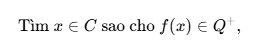

# Gradient approach

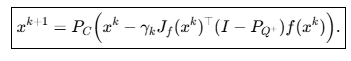

# Implement

In [2]:
from scipy.optimize import Bounds
from autograd import grad
import autograd.numpy as np  
from autograd import jacobian
from project import Projection
from algorithm_CQ import CQ_split_acceptance
from problem import Problem

In [3]:
def f(x):
    return np.array([
        4*x[0]**2 + 4*x[1]**2,
        (x[0] - 5)**2 + (x[1] - 5)**2
    ])


#--------------- C --------------------#
def c1(x):
    return (x[0] - 5)**2 + x[1]**2 - 25
def c2(x):
    return (x[0] - 8)**2 + (x[1] + 3)**2 - 7.7


#--------------- Q --------------------#
def q1(x):
    return -x[0] + 100
def q2(x):
    return x[0] - 200

def q3(x):
    return -x[1] + 30
def q4(x):
    return x[1] - 60



In [4]:
c1_dx = grad(c1)
c2_dx = grad(c2)

q1_dx = grad(q1)
q2_dx = grad(q2)
q3_dx = grad(q3)
q4_dx = grad(q4)

In [5]:
cons_C = (
    {
        'type': 'ineq',
        'fun' : lambda x: np.array([-c1(x)]),     
#         'jac' : lambda x: np.array([-c1_dx(x)])   
    },
    
    {
        'type': 'ineq',
        'fun' : lambda x: np.array([-c2(x)]),     
#         'jac' : lambda x: np.array([-c2_dx(x)])
    }
)

dim_x = 2
bounds_x = Bounds([-15,-15],[30, 30])


In [6]:
cons_Q = (
    {
        'type': 'ineq',
        'fun' : lambda x: np.array([-q1(x)]),     
    },
    
    {
        'type': 'ineq',
        'fun' : lambda x: np.array([-q2(x)]),     
    },
    
    {
        'type': 'ineq',
        'fun' : lambda x: np.array([-q3(x)]),     
    },
    
    {
        'type': 'ineq',
        'fun' : lambda x: np.array([-q4(x)]),     
    }
)

bounds_f = None
dim_f = 2
# bounds_f =  Bounds([100,30],[200, 60])

In [7]:
cons_Qplus = (
    {
        'type': 'ineq',
        'fun' : lambda x: np.array([-q2(x)]),     
#         'jac' : lambda x: np.array([-q2_dx(x)])   
    },
    
    {
        'type': 'ineq',
        'fun' : lambda x: np.array([-q4(x)]),     
#         'jac' : lambda x: np.array([-q4_dx(x)])
    },
)

In [8]:
proj_C = Projection(cons=cons_C, bounds=bounds_x, dim=dim_x, proj_type='euclid')

proj_Qplus = Projection(cons=cons_Q, bounds=bounds_f, dim=dim_f, proj_type='qplus')

prob = Problem(
    f=[f],
    jac_f=[jacobian(f)],
    C=[c1, c2],
    Q=[q1, q2, q3, q4],
    dim_x=dim_x,
    dim_y=dim_f,
    proj_C=proj_C.project,
    proj_Qplus=proj_Qplus.project
    
)

In [81]:
x0 = np.random.rand(1,dim_x).tolist()
x0 = [[12.0, 0.0]]

In [89]:
x_opt, x_hist, f_hist, z_proj_hist = CQ_split_acceptance(
                                f=prob.objective_func,
                                jac_f=prob.jacobian,
                                proj_C=prob.proj_C,
                                proj_Qplus=prob.proj_Qplus,
                                x0=x0,
                                gamma=0.4,
                                max_iter=100,
                                tol=1e-6
                            )

Khởi tạo: x0: [[12.0, 0.0]]
Chiếu lên C được: x: [ 9.9029 -0.9804]


 10%|█         | 10/100 [00:00<00:00, 199.30it/s]


Hội tụ tại vòng lặp 10
+----+------------------------+----------------------------+----------------------------+----------+------------+
| k  | x_new                  | y                          | z_proj                     |   e_x    |    e_f     |
+----+------------------------+----------------------------+----------------------------+----------+------------+
| 0  | [ 9.902941, -0.980392] | [[396.117642,  59.803923]] | [[200.      ,  59.803923]] | 5.093535 | 196.117642 |
| 1  | [ 5.225116, -2.995845] | [[145.107681,  63.984211]] | [[145.107681,  60.      ]] | 0.879139 |  3.984211  |
| 2  | [ 5.36308 , -3.864091] | [[174.775292,  78.70393 ]] | [[174.775292,  60.      ]] | 3.955770 | 18.703930  |
| 3  | [ 7.178506, -0.349501] | [[206.61239 ,  33.363044]] | [[200.      ,  33.363044]] | 3.109540 |  6.612390  |
| 4  | [ 5.234155, -2.776172] | [[140.414029,  60.523687]] | [[140.414029,  60.      ]] | 0.239778 |  0.523687  |
| 5  | [ 5.234103, -3.01595 ] | [[145.967181,  64.310265]] | [[1

# Viz

In [90]:
from utils import visualize_complete_system

Đang xử lý dữ liệu và tạo đồ thị tổng hợp...


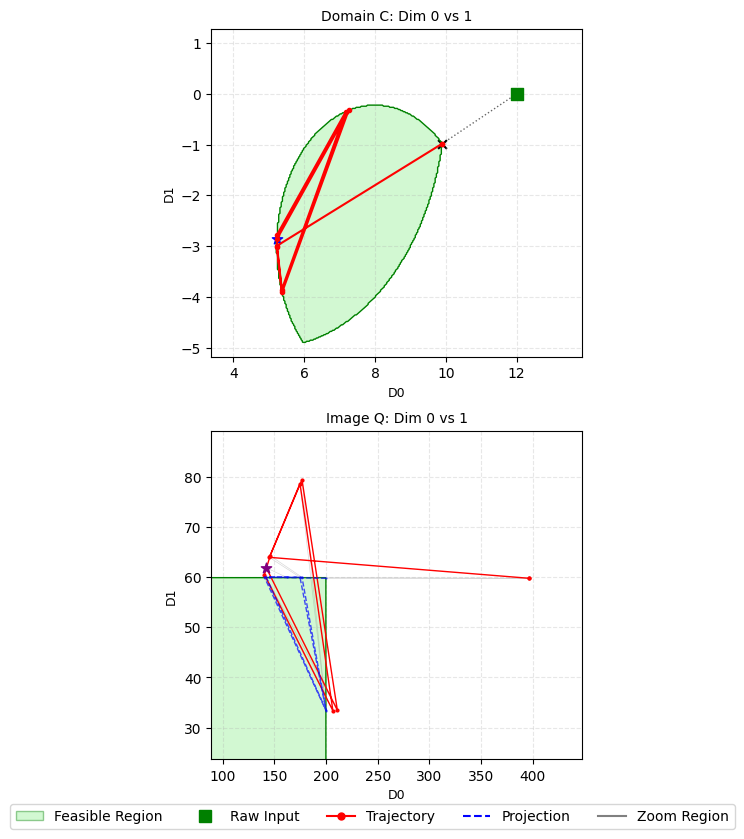

In [91]:
_ = visualize_complete_system(
    x_hist, f_hist, z_proj_hist,
    cons_C, cons_Qplus,
    x0=x0[0],   
)

# Vẽ lại luồng thuật toán

<font size=5>Tìm $x\in C$ sao cho $\exists y \in Q$ thỏa mãn $f(x) \leq y \quad(1)$ 

trong đó: 
* $C, Q$ là tập lồi, đóng
* $f$ là ánh xạ lồi

---

Định nghĩa: 

<font size=4> $Q^+ = \{z \in R^m | \exists y \in Q, z \leq y\}$

Khi đó:

<font size=4> $ (1) \Leftrightarrow $ Tìm $x \in C$ sao cho $f(x) \in Q^+$

---

Hàm khoảng cách:

$ \Phi(x) := \frac{1}{2} \rVert f(x) - P_{Q^+}(f(x)\rVert^2  $

Mục tiêu: đưa $f(x)$ về gần với hình chiếu của nó trên tập $Q^+$ nhất

* $\Phi(x) = 0 \rightarrow x$ là nghiệm chấp nhận tách
* $\Phi(x) \neq 0 \rightarrow $ chuyển về bài toán xấp xỉ tốt nhất

---


<font size=5> $\nabla \Phi (x) = J_f(x)^T (I - P_{Q^+})f(x)$

Công thức cập nhật $x^k$

<font size=5> $\Rightarrow x^{k+1} = P_C(x^k - \gamma_k \nabla\Phi(x^k))$ 

---

$P_C(\tilde x) = \text{Argmin}_{x \in C} \rVert x - \tilde x \rVert ^2$

---

$y^* = \text{Argmin}_{y \in Q} \rVert (y - \tilde z )_+\rVert ^2$

$P_{Q^+}(\tilde z) = \text{min}(\tilde z, y^*) = \tilde z - (\tilde z - y^*)_+$